In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# 데이터 처리    

buy_data1 => 상품구매정보   
buy_data2 => 제휴사 이용정보  
buy_data3 => 엘페이 이용정보   

In [47]:
# read data
data1 = pd.read_csv("./drive/MyDrive/LPOINT_BIG_COMP_01_DEMO.csv")   # cust 고객번호 ma_fem_dv 성별 ages 나이 zon_hlv 거주지코드
data2 = pd.read_csv("./drive/MyDrive/LPOINT_BIG_COMP_02_PDDE.csv")   # cust 고객번호 rct_no 영수증번호 chnl_dv 채널구분 cop_c 제휴사코드 br_c 점포코드 pd_c 상품코드 de_dt 거래일 de_hr 거래시간 buy_am 구매가격 buy_ct 구매개수
data3 = pd.read_csv("./drive/MyDrive/LPOINT_BIG_COMP_03_COP_U.csv")  # cust 고객번호 rct_no 영수중번호 cop_c 제휴사코드 br_c 점포코드 chnl_dv 채널구분 de_dt 거래일 vst_dt 방문일 de_hr 거래시간 buy_am 결제금액
data4 = pd.read_csv("./drive/MyDrive/LPOINT_BIG_COMP_04_PD_CLAC.csv")# pd_c 상품번호 pd_nm 상품명 clac_hlv_nm 카테고리 clac_mcls_nm 세부카테고리 
data5 = pd.read_csv("./drive/MyDrive/LPOINT_BIG_COMP_05_BR.csv")     # br_c 점포번호 cop_c 제휴사 코드 zon_hlv 카테고리 zon_mcls 세부카테고리
data6 = pd.read_csv("./drive/MyDrive/LPOINT_BIG_COMP_06_LPAY.csv")   # rct_no 영수증 번호 cop_c 제휴사코드 chnl_dv 채널구분 de_dt 구매일 de_hr 구매시간 buy_am 결제금액

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 상품구매정보_통합
buy_data1 = pd.merge(data2, data1, on='cust', how='left')
buy_data1 = pd.merge(buy_data1, data4, on='pd_c', how='left')
buy_data1 = pd.merge(buy_data1, data5, on='br_c', how='left')

In [ ]:
# 제휴사이용정보_통합
buy_data2 = pd.merge(data3, data1, on='cust', how='left')
buy_data2 = pd.merge(buy_data2, data5, on='br_c', how='left')

In [ ]:
# 엘페이이용_통합
buy_data3 = pd.merge(data6, data1, on='cust', how='left')

In [ ]:
# 결측치 확인
buy_data1.isnull().sum()

cust                 0
rct_no               0
chnl_dv              0
cop_c_x              0
br_c            428501
pd_c                 0
de_dt                0
de_hr                0
buy_am               0
buy_ct               0
ma_fem_dv            0
ages                 0
zon_hlv_x            0
pd_nm                0
clac_hlv_nm          0
clac_mcls_nm         0
cop_c_y         428501
zon_hlv_y       428501
zon_mcls        428501
dtype: int64

In [ ]:
# 결측치 확인결과, 구매채널이 온라인일 경우 점포정보가 없는것이므로 결측치 처리 불필요 
buy_data1[buy_data1['br_c'].isnull()].head()

,cust,rct_no,chnl_dv,cop_c_x,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv_x,pd_nm,clac_hlv_nm,clac_mcls_nm,cop_c_y,zon_hlv_y,zon_mcls
424,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1,여성,30대,Z03,여성스웨터/풀오버,여성의류,여성의류상의,NaN,NaN,NaN
425,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1,남성,40대,Z04,남성백팩,패션잡화,남성가방,NaN,NaN,NaN
426,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1,여성,40대,Z06,남성장갑,패션잡화,장갑,NaN,NaN,NaN
427,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1,여성,40대,Z10,남성패딩,남성의류,남성의류아우터,NaN,NaN,NaN
428,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1,남성,20대,Z17,여성스니커즈,패션잡화,여성화,NaN,NaN,NaN


In [ ]:
#결측치 확인
buy_data2.isnull().sum()

cust          0
rct_no        0
cop_c_x       0
br_c         55
chnl_dv       0
de_dt         0
vst_dt        0
de_hr         0
buy_am        0
ma_fem_dv     0
ages          0
zon_hlv_x     0
cop_c_y      55
zon_hlv_y    55
zon_mcls     55
dtype: int64

In [ ]:
# 결측치 확인결과, 구매채널이 온라인일 경우 점포정보가 없는것이므로 결측치 처리 불필요 
buy_data1[buy_data1['br_c'].isnull()].head()

,cust,rct_no,chnl_dv,cop_c_x,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv_x,pd_nm,clac_hlv_nm,clac_mcls_nm,cop_c_y,zon_hlv_y,zon_mcls
424,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1,여성,30대,Z03,여성스웨터/풀오버,여성의류,여성의류상의,NaN,NaN,NaN
425,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1,남성,40대,Z04,남성백팩,패션잡화,남성가방,NaN,NaN,NaN
426,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1,여성,40대,Z06,남성장갑,패션잡화,장갑,NaN,NaN,NaN
427,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1,여성,40대,Z10,남성패딩,남성의류,남성의류아우터,NaN,NaN,NaN
428,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1,남성,20대,Z17,여성스니커즈,패션잡화,여성화,NaN,NaN,NaN


In [ ]:
#결측치 확인 (결측치 없음)
buy_data3.isnull().sum()

cust         0
rct_no       0
cop_c        0
chnl_dv      0
de_dt        0
de_hr        0
buy_am       0
ma_fem_dv    0
ages         0
zon_hlv      0
dtype: int64

# 데이터 분석 (상품구매정보)

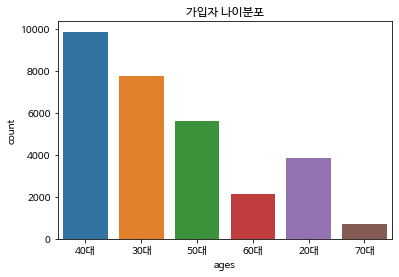

In [ ]:
# 연령분포
plt.rc('font', family='NanumBarunGothic')
sns.countplot(x="ages", data = data1).set_title('가입자 나이분포')
plt.show()

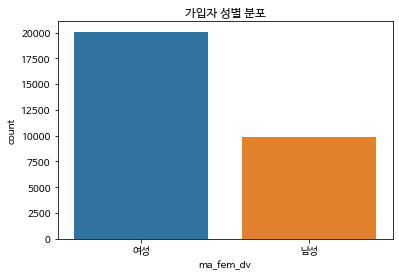

In [ ]:
# 성별 분포
sns.countplot(x="ma_fem_dv", data = data1).set_title('가입자 성별 분포')
plt.show()

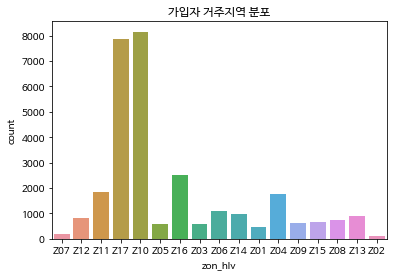

In [ ]:
# 지역분포
sns.countplot(x="zon_hlv", data = data1).set_title('가입자 거주지역 분포')
plt.show()

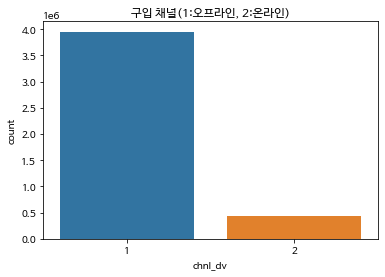

In [ ]:
sns.countplot(x="chnl_dv", data = buy_data1).set_title('구입 채널(1:오프라인, 2:온라인)')
plt.show()

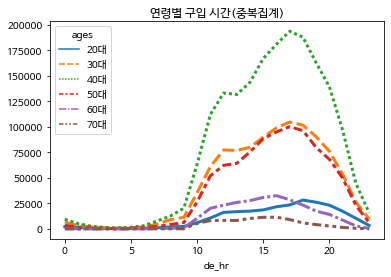

In [ ]:
plt.rc('font', family='NanumBarunGothic')
pt_data = pd.pivot_table(data = buy_data1, index = "de_hr", columns = "ages", aggfunc = "size", fill_value = 0) 
sns.lineplot(data = pt_data, linewidth = 3).set_title("연령별 구입 시간(중복집계)")
plt.show()

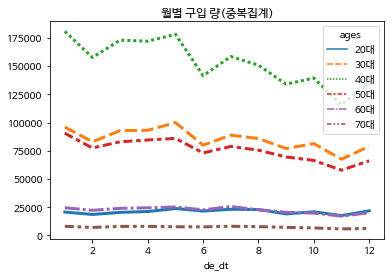

In [ ]:
plt.rc('font', family='NanumBarunGothic')
temp = buy_data1.copy()
temp['de_dt'] = temp['de_dt']//100%100
pt_data = pd.pivot_table(data = temp, index = "de_dt", columns = "ages", aggfunc = "size", fill_value = 0) 
sns.lineplot(data = pt_data, linewidth = 3).set_title("월별 구입 량(중복집계)")
plt.show()

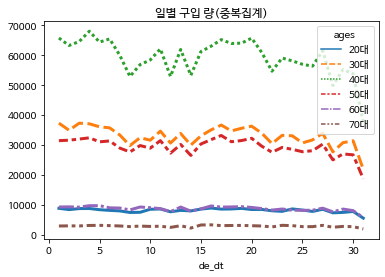

In [ ]:
plt.rc('font', family='NanumBarunGothic')
temp = buy_data1.copy()
temp['de_dt'] = temp['de_dt']%100
pt_data = pd.pivot_table(data = temp, index = "de_dt", columns = "ages", aggfunc = "size", fill_value = 0) 
sns.lineplot(data = pt_data, linewidth = 3).set_title("일별 구입 량(중복집계)")
plt.show()

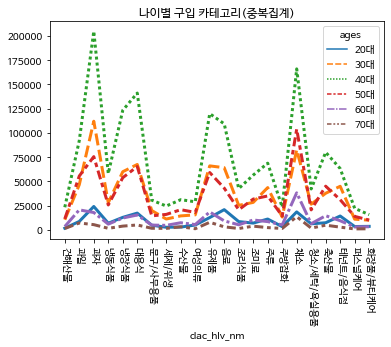

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=-90)
pt_data = pd.pivot_table(data = buy_data1, index = "clac_hlv_nm", columns = "ages", aggfunc = "size", fill_value = 0)
pt_data = pt_data[pt_data>1000].dropna(axis=0, how='any')
pt_data
sns.lineplot(data = pt_data, linewidth = 3).set_title("나이별 구입 카테고리(중복집계)")
plt.show()

In [ ]:
# 월별 구입 물품 카테고리 비교
t1 = buy_data1[buy_data1['de_dt']//100%100==1]['clac_hlv_nm'].value_counts()

In [ ]:
t12 = buy_data1[buy_data1['de_dt']//100%100==12]['clac_hlv_nm'].value_counts()

In [ ]:
t_mean = buy_data1['clac_hlv_nm'].value_counts()/12

In [ ]:
(t12-t_mean).sort_values()

채소           -4801.833333
음료           -4174.250000
유제품          -3414.666667
냉장식품         -3232.750000
과일           -3182.500000
축산물          -3035.500000
과자           -3032.250000
대용식          -2580.166667
냉동식품         -2543.000000
조미료          -1620.333333
세제/위생        -1390.750000
스포츠패션         -994.166667
여성의류          -754.083333
주방잡화          -615.583333
건해산물          -526.250000
퍼스널케어         -521.666667
유아동의류         -515.083333
병통조림          -489.750000
조리식품          -380.833333
건강식품          -355.500000
속옷/양말/홈웨어     -349.833333
원예/애완         -334.000000
식기/조리기구       -293.250000
양곡            -263.833333
출산/육아용품       -247.000000
침구/수예         -157.500000
구기/필드스포츠      -143.833333
유아식품          -134.500000
수산물           -131.000000
가구            -110.000000
헬스/피트니스        -94.416667
시즌스포츠          -86.083333
생활/주방가전        -80.000000
냉장/세탁가전        -69.083333
건강용품           -62.083333
생활/렌탈서비스       -60.250000
아웃도어/레저        -48.333333
컴퓨터            -48.083333
모바일         

In [ ]:
buy_data1.head()

,cust,rct_no,chnl_dv,cop_c_x,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv_x,pd_nm,clac_hlv_nm,clac_mcls_nm,cop_c_y,zon_hlv_y,zon_mcls
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,여성,40대,Z13,기타주방일회용품,주방잡화,주방일회용품,A01,Z13,Z13001
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042


# 온라인, 오프라인 Lpay 사용 비율 분석


In [77]:
data2_online = data2[data2['chnl_dv']==2].drop_duplicates()
data2_offline = data2[data2['chnl_dv']==1].drop_duplicates()

data3_online = data3[data3['chnl_dv']==2].drop_duplicates()
data3_offline = data3[data3['chnl_dv']==1].drop_duplicates()

data6_online = data6[data6['chnl_dv']==2].drop_duplicates()
data6_offline = data6[data6['chnl_dv']==1].drop_duplicates()


In [78]:
data2_online_len = len(data2_online)
data2_offline_len = len(data2_offline)

data3_online_len = len(data3_online)
data3_offline_len = len(data3_offline)

data6_online_len = len(data6_online)
data6_offline_len = len(data6_offline)

In [79]:
data2_online_lpay = len(pd.merge(data2_online, data6_online, on=["cust",'chnl_dv', 'buy_am', 'de_dt', 'de_hr']))
data2_offline_lpay = len(pd.merge(data2_offline, data6_offline, on=["cust",'chnl_dv', 'buy_am', 'de_dt', 'de_hr']))

data3_online_lpay = len(pd.merge(data3_online, data6_online, on=["cust",'chnl_dv', 'buy_am', 'de_dt', 'de_hr']))
data3_offline_lpay = len(pd.merge(data3_offline, data6_offline, on=["cust",'chnl_dv', 'buy_am', 'de_dt', 'de_hr']))

In [100]:
print(f"전체 {data6_offline_len}건의 Lpay 오프라인 결제 중 {data2_offline_lpay}건 data2에서 발견, {data3_offline_lpay}건 data3에서 발견")
print(f'전체 오프라인 Lpay사용 건 중 {(data2_offline_lpay+data3_offline_lpay)/data6_offline_len*100:.2f}% 만 발견')
print(f"전체 {data6_online_len}건의 Lpay 온라인 결제 중 {data2_online_lpay}건 data2에서 발견, {data3_online_lpay}건 data3에서 발견")
print(f'전체 온라인 Lpay사용 건 중 {(data2_online_lpay+data3_online_lpay)/data6_online_len*100:.2f}% 만 발견')

전체 150010건의 Lpay 오프라인 결제 중 36194건 data2에서 발견, 12100건 data3에서 발견
전체 오프라인 Lpay사용 건 중 32.19% 만 발견
전체 203174건의 Lpay 온라인 결제 중 2420건 data2에서 발견, 9562건 data3에서 발견
전체 온라인 Lpay사용 건 중 5.90% 만 발견


Lpay 사용 건 중 소수만 data2와 data3에서 찾을 수 있으므로 아래 분석의 신뢰도는 낮을 수도 있음      
data2와 data3에서의 구매내역중 Lpay를 이용한 경우가 전부 data6에 있을거라 장담할 수 없음 

In [101]:
print(f'data2에서 온라인 구매의 Lpay 사용률 : {data2_online_lpay/data2_online_len*100:.3f}%  오프라인 구매의 Lpay 사용률 : {data2_offline_lpay/data2_offline_len*100:.3f}%')
print(f'data3에서 온라인 구매의 Lpay 사용률 : {data3_online_lpay/data3_online_len*100:.3f}%  오프라인 구매의 Lpay 사용률 : {data3_offline_lpay/data3_offline_len*100:.3f}%')
print(f"\ndata2와 data3 통합 온라인 구매의 Lpay 사용률 : {(data2_online_lpay+data3_online_lpay)/(data2_online_len+data3_online_len)*100:.3f}% 오프라인 구매의 Lpay사용률 : {(data2_offline_lpay+data3_offline_lpay)/(data2_offline_len+data3_offline_len)*100:.3f}%")

data2에서 온라인 구매의 Lpay 사용률 : 0.644%  오프라인 구매의 Lpay 사용률 : 0.960%
data3에서 온라인 구매의 Lpay 사용률 : 27.494%  오프라인 구매의 Lpay 사용률 : 5.667%

data2와 data3 통합 온라인 구매의 Lpay 사용률 : 2.918% 오프라인 구매의 Lpay사용률 : 1.213%
